<a href="https://colab.research.google.com/github/mehdihatami1998/DynamicsOfStructures/blob/main/L10_Constant_Acceleration_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

# The Constant Acceleration Algorithm

### System properties and derived quantities

In [ ]:
mass = 6E05
T_n  = 0.60
wn   = 2*pi/T_n
k    = mass*wn**2
zeta = 0.02
wd   = wn * sqrt(1.00-zeta**2)
damp = 2*zeta*mass*wn

### The loading

In [ ]:
def p(t):
    if t < 1.00 : return 4E5 * t
    if t < 3.00 : return 2E5 * (3-t)
    return 0.00

### Time step $h$ and algorithmic constants depending on it

In [ ]:
h = 0.025

k_ = k + 2*damp/h + 4*mass/h/h

cv = 2*damp + 4*mass/h
ca = 2*mass

### The initial conditions (rest conditions)

In [ ]:
x_ = [] ; v_ = [] ; t_ = []

t = 0.00 ; X = 0.00 ; V = 0.00 ; P = p(t)
A = (P - V*damp - X*k)/mass

### The loop over time

In [ ]:
while t < 6.00:
    x_.append(X) ; v_.append(V) ; t_.append(t)
    # print "%6.3f   %+12.10f %+12.10f" % (t, X, V)
    t = t+h
    Ph = p(t)
    dp_ = (Ph-P) + cv*V + ca*A
    dx  = dp_/k_
    dv  = 2*dx/h - 2*V
    X = X+dx ; V = V+dv
    P = Ph ; A = (P - damp*V - k*X)/mass 

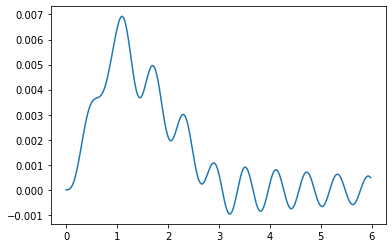

In [ ]:
plot(t_, x_)
None